# Options 1

## Load Packages

In [1]:
using Dates

include("jlFiles/printmat.jl")

printlnPs (generic function with 2 methods)

In [2]:
using Plots
backend = "gr"              #"gr" (default), "pyplot" 

if backend == "pyplot"
    pyplot(size=(600,400))
else    
    gr(size=(480,320))
    default(fmt = :svg)
end

# Payoffs and Profits of Options

Let $K$ be the strike price and $S_m$ the price of the underlying at expiration of the option contract. 

The call and put profits (at expiration) are

$\text{call profit}_{m}\ = \max\left(  0,S_{m}-K\right) - C$

$\text{put profit}_{m}=\max\left(  0,K-S_{m}\right)  - P $,

where $C$ is the price of a call option today and $P$ of a put option.

The profit of a straddle is the sum of those of a call and a put.

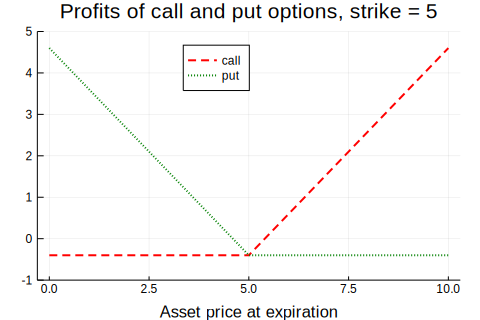

In [3]:
Sₘ = 0:0.1:10          #possible values of underlying at expiration
K  = 5                 #strike price
C  = 0.4               #call price (just a number that I made up)
P  = 0.4               #put price 

CallProfit = max.(0,Sₘ.-K) .- C
PutProfit  = max.(0,K.-Sₘ) .- P


p1 = plot(Sₘ,CallProfit,color=:red,line=(:dash,2),label="call")
plot!(Sₘ,PutProfit,color=:green,line=(:dot,2),label="put")
plot!(ylim=(-1,5),legend=:top)
title!("Profits of call and put options, strike = $K")
xlabel!("Asset price at expiration")

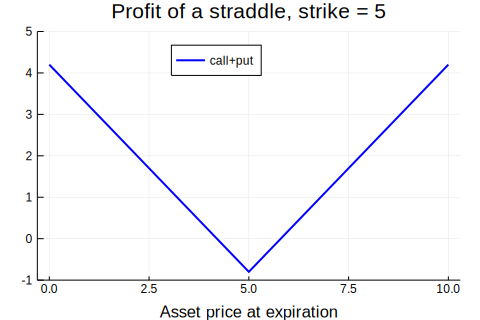

In [4]:
StraddleProfit = CallProfit + PutProfit

p1 = plot(Sₘ,StraddleProfit,color=:blue,linewidth=2,label="call+put")
plot!(ylim=(-1,5),legend=:top)
title!("Profit of a straddle, strike = $K")
xlabel!("Asset price at expiration")

# Put-Call Parity for European Options

A no-arbitrage condition says that 
$
C-P=e^{-my}(F-K)
$
must hold, where $F$ is the forward price.

When the underying asset has no dividends (until expiration of the option), then $F=e^{my}S$.

In [5]:
S = 42                     #current price of underlying etc                       
K = 42
m = 0.5
y = 0.05
σ = 0.2

C = 2.893                  #assume this is the price of a call option(K)

F = exp(m*y)*S
P = C - exp(-m*y)*(F.-K)

printlnPs("C and P (for the same strike price) are: ",C,P)

C and P (for the same strike price) are:      2.893     1.856


# Pricing Bounds

The pricing bounds for (American and European) call options are

$\begin{align}
C  &  \leq e^{-my}F\\
C  &  \geq\max[0,e^{-my}(F-K)]
\end{align}$

The pricing bounds for (European) put options are

$\begin{align}
P_{E}  &  \leq e^{-my}K\\
e^{-my}(K-F)  &  \leq P_{E}
\end{align}$

In [6]:
S = 42
m = 0.5
y = 0.05
K_range = 30:0.5:50
n = length(K_range)

F = exp(m*y)*S

C_Upper = exp(-m*y)*F
C_Lower = max.(0,exp(-m*y)*(F.-K_range))

P_Upper = exp(-m*y)*K_range
P_Lower = max.(0,exp(-m*y)*(K_range.-F))

println()

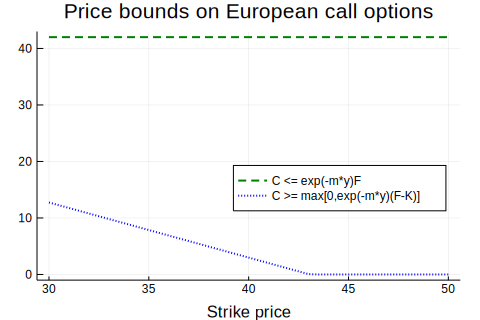

In [7]:
p1 = plot(K_range,C_Upper*ones(n),color=:green,linewidth=2,line=(:dash),label=" C <= exp(-m*y)F ")
plot!(K_range,C_Lower,color=:blue,linewidth=2,line=(:dot,2),label=" C >= max[0,exp(-m*y)(F-K)]  ")
plot!(ylim=(-1,S+1),legend=:right)
title!("Price bounds on European call options")
xlabel!("Strike price")

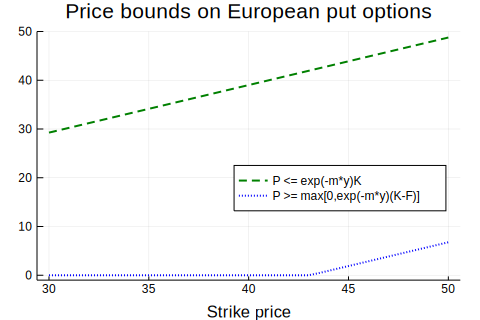

In [8]:
p1 = plot(K_range,P_Upper,color=:green,linewidth=2,line=(:dash),label=" P <= exp(-m*y)K ")
plot!(K_range,P_Lower,color=:blue,linewidth=2,line=(:dot,2),label=" P >= max[0,exp(-m*y)(K-F)]  ")
plot!(ylim=(-1,50),legend=:right)
title!("Price bounds on European put options")
xlabel!("Strike price")